In [22]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

Research on reversion of Kelp

In [23]:
for i, day in enumerate([-2, -1, 0, 1, 2, 3, 4]):
    file_name = f"../round3_new/round-3-island-data-bottle/prices_round_3_day_{day}.csv"
    df_tmp = pd.read_csv(file_name, sep=';')
    df_tmp['day'] = day
    if i > 0:
        df = pd.concat([df, df_tmp])
    else:
        df = df_tmp
df = df.reset_index(drop=True)

In [24]:
df_kelp = df[df["product"] == "KELP"].reset_index(drop=True).copy()

Calculate the reversion of filtered mid price. The thresholding volume is 15.

In [25]:
def find_min_i_bid(row):
    for i in range(1, 4):
        if row[f'bid_volume_{i}'] >= 15:
            return pd.Series([row[f'bid_price_{i}'], row[f'bid_volume_{i}']])
    return pd.Series([np.nan, np.nan])

def find_min_i_ask(row):
    for i in range(1, 4):
        if row[f'ask_volume_{i}'] >= 15:
            return pd.Series([row[f'ask_price_{i}'], row[f'ask_volume_{i}']])
    return pd.Series([np.nan, np.nan])

df_kelp[['filtered_bid_price', 'filtered_bid_volume']] = df_kelp.apply(find_min_i_bid, axis=1)
df_kelp[['filtered_ask_price', 'filtered_ask_volume']] = df_kelp.apply(find_min_i_ask, axis=1)


In [26]:
df_kelp

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,filtered_bid_price,filtered_bid_volume,filtered_ask_price,filtered_ask_volume
0,-2,0,KELP,1998.0,26.0,NaN,NaN,NaN,NaN,2002.0,...,NaN,NaN,NaN,NaN,2000.0,0.0,1998.0,26.0,2002.0,26.0
1,-2,100,KELP,2000.0,5.0,1999.0,6.0,1998.0,20.0,2002.0,...,NaN,NaN,NaN,NaN,2001.0,0.0,1998.0,20.0,2002.0,20.0
2,-2,200,KELP,1999.0,1.0,1998.0,30.0,NaN,NaN,2002.0,...,NaN,NaN,NaN,NaN,2000.5,0.0,1998.0,30.0,2002.0,31.0
3,-2,300,KELP,1999.0,27.0,NaN,NaN,NaN,NaN,2002.0,...,NaN,NaN,NaN,NaN,2000.5,0.0,1999.0,27.0,2002.0,27.0
4,-2,400,KELP,1999.0,20.0,NaN,NaN,NaN,NaN,2002.0,...,NaN,NaN,NaN,NaN,2000.5,0.0,1999.0,20.0,2002.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,4,999500,KELP,2011.0,22.0,NaN,NaN,NaN,NaN,2015.0,...,NaN,NaN,NaN,NaN,2013.0,0.0,2011.0,22.0,2015.0,22.0
69996,4,999600,KELP,2011.0,30.0,NaN,NaN,NaN,NaN,2013.0,...,2015.0,30.0,NaN,NaN,2012.0,0.0,2011.0,30.0,2015.0,30.0
69997,4,999700,KELP,2011.0,28.0,NaN,NaN,NaN,NaN,2015.0,...,NaN,NaN,NaN,NaN,2013.0,0.0,2011.0,28.0,2015.0,29.0
69998,4,999800,KELP,2012.0,5.0,2011.0,29.0,NaN,NaN,2014.0,...,2015.0,27.0,NaN,NaN,2013.0,0.0,2011.0,29.0,2015.0,27.0


In [27]:
df_kelp['filtered_mid'] = (df_kelp["filtered_ask_price"] + df_kelp["filtered_bid_price"]) / 2

In [28]:
df_kelp['filtered_mid'] = df_kelp['filtered_mid'].fillna(df_kelp['mid_price'])

In [29]:
df_kelp['filtered_mid'].isnull().sum()

0

In [30]:
df_kelp[['filtered_bid_volume', 'filtered_ask_volume', 'filtered_bid_price', 'filtered_ask_price']] = df_kelp[['filtered_bid_volume', 'filtered_ask_volume', 'filtered_bid_price', 'filtered_ask_price']] .fillna(0)

In [31]:
df_kelp['rtn'] = df_kelp['filtered_mid'].pct_change()
df_kelp['rtn_lag_1'] = df_kelp['rtn'].shift()

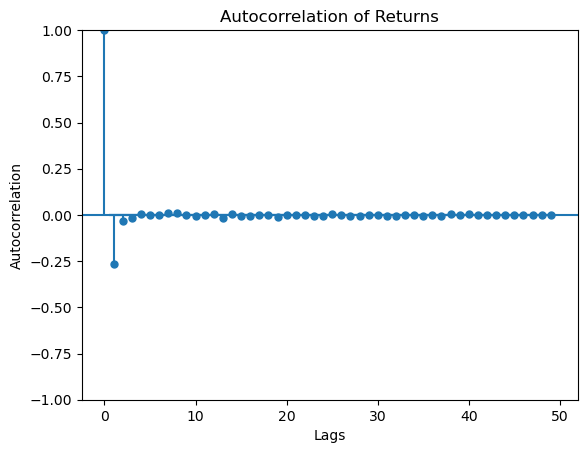

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(df_kelp['rtn'].dropna())
plt.title('Autocorrelation of Returns')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

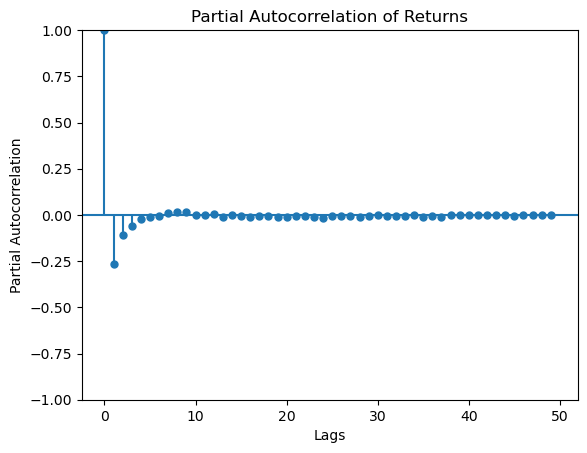

In [33]:
plot_pacf(df_kelp['rtn'].dropna())
plt.title('Partial Autocorrelation of Returns')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [34]:
df_kelp['imb'] = (df_kelp['filtered_bid_volume'] - df_kelp['filtered_ask_volume']) / (df_kelp['filtered_bid_volume'] + df_kelp['filtered_ask_volume'])
df_kelp.loc[(df_kelp['filtered_bid_volume'] == 0) & (df_kelp['filtered_ask_volume'] == 0), 'imb'] = 0

In [35]:
df_kelp['rtn'][2:].corr(df_kelp['rtn_lag_1'][2:])

-0.26438583891228784

In [36]:
df_kelp['rtn'].corr(df_kelp['imb'].shift())

0.03461326683232319

In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df_kelp[['rtn', 'imb']].shift().values[2:], df_kelp['rtn'].values[2:].reshape(-1, 1))


LinearRegression()

In [38]:
lr.coef_, lr.intercept_

(array([[-2.63507326e-01,  5.98357172e-05]]), array([-1.54944435e-07]))

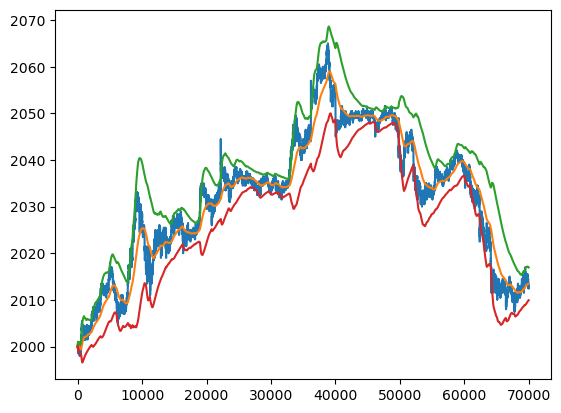

In [44]:
plt.plot(df_kelp['filtered_mid'])
theo = df_kelp['filtered_mid'].ewm(alpha=0.001).mean()
std = df_kelp['filtered_mid'].ewm(alpha=0.001).std()
thres = 2
plt.plot(theo, label='Theoretical Price')
plt.plot(theo + thres * std)
plt.plot(theo - thres * std)
plt.show()

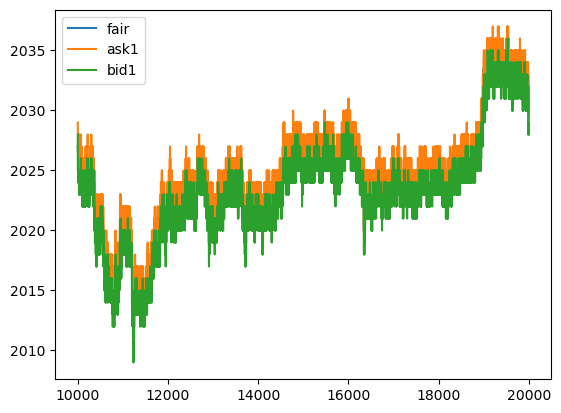

In [40]:
begin = 10000
end = 20000
plt.plot(df_kelp['filtered_mid'][begin:end], label='fair')
plt.plot(df_kelp['ask_price_1'][begin:end], label='ask1')
plt.plot(df_kelp['bid_price_1'][begin:end], label='bid1')
plt.legend()
plt.show()

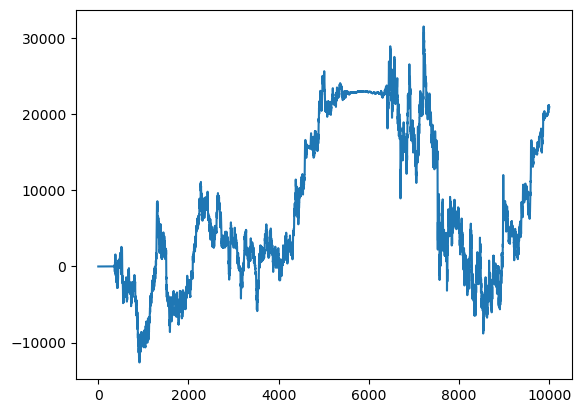

In [41]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
with open("pnl_history_day_1.json", "r") as f:
    pnl_history = json.load(f)
plt.plot(pd.Series(pnl_history['KELP'], dtype=np.float64).ffill().to_numpy() + pd.Series(pnl_history['VOLCANIC_ROCK_VOUCHER_10000'], dtype=np.float64).ffill().to_numpy() )
plt.show()